I've implemented the integral of wt in pearce. This notebook verifies it works as I believe it should. 

In [1]:
from pearce.mocks import cat_dict
import numpy as np
from os import path
from astropy.io import fits

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
a = 0.645161
z = 1.0/a - 1.0

Load up a snapshot at a redshift near the center of this bin. 

In [4]:
print z

0.5500006975


This code load a particular snapshot and and a particular HOD model. In this case, 'redMagic' is the Zheng07 HOD with the f_c variable added in.

In [5]:
for boxno in xrange(40):
    cosmo_params = {'simname':'trainingbox', 'boxno':boxno, 'scale_factors':[a]}
    cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

    cat.load_catalog(a, particles = True, downsample_factor = 1e-2)

    cat.halocat.halo_table.write('/u/ki/swmclau2/des/Trainbox_%02d_LSD.hdf5'%boxno, format = 'hdf5', path = 'Trainbox_%02d_LSD.hdf5'%boxno, overwrite = True)

In [9]:
np.sum(cat.halocat.halo_table['halo_local_density_10'] ==0)*1.0/len(cat.halocat.halo_table['halo_local_density_10'])

0.0

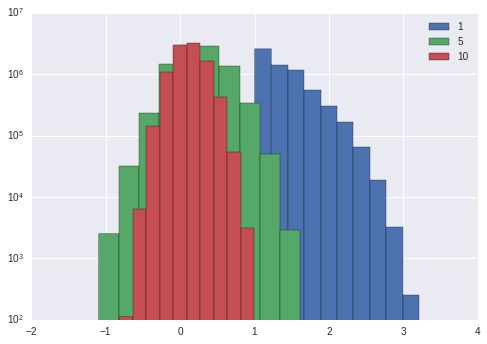

In [16]:
gtz = cat.halocat.halo_table['halo_local_density_1'] > 0
plt.hist(np.log10(cat.halocat.halo_table['halo_local_density_1'][gtz]), label = '1')
gtz = cat.halocat.halo_table['halo_local_density_5'] > 0
plt.hist(np.log10(cat.halocat.halo_table['halo_local_density_5'][gtz]), label = '5')
plt.hist(np.log10(cat.halocat.halo_table['halo_local_density_10']), label = '10')

plt.legend(loc='best')
plt.yscale('log')

[]

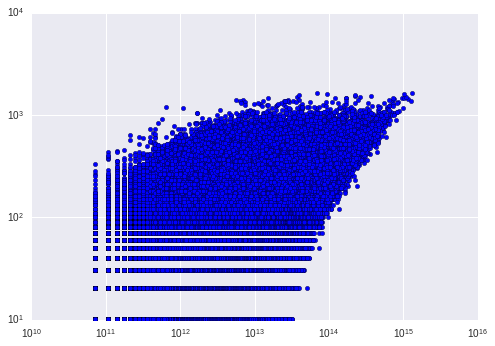

In [14]:
gtz = cat.halocat.halo_table['halo_local_density_1'] > 0
plt.scatter( cat.halocat.halo_table['halo_mvir'][gtz], cat.halocat.halo_table['halo_local_density_1'][gtz] )
plt.loglog()

In [12]:
from astropy import units

cat.cosmology.critical_density(a).to( (units.Msun)/(units.Mpc**3) )

<Quantity 2.40418259e+11 solMass / Mpc3>